# ANALYSIS OF SONOS PRODUCTS
Author: Shreya Kuruvilla

In [1]:
# Importing required packages
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Data collection and loading

Product information for all Sonos speakers was scraped on 02-04-19 from https://www.sonos.com.

In [2]:
# Loading data 
sonos=pd.read_csv("sonos.csv") 
sonos.head(15)

#price_old refers to prices before discounts. Value is NaN in case of no discount for product.

,name,url,description,price_new,price_old
0,One,https://www.sonos.com/en-us/shop/one.html,The smart speaker for music lovers,$199,NaN
1,HAY Sonos One Limited Edition,https://www.sonos.com/en-us/shop/hay-sonos-one...,The relationship between sound and home design,$229,NaN
2,Play:1,https://www.sonos.com/en-us/shop/play1.html,The mini home speaker with mighty sound.,$149,NaN
3,Play:5,https://www.sonos.com/en-us/shop/play5.html,The powerful high-fidelity speaker,$499,NaN
4,Beam,https://www.sonos.com/en-us/shop/beam.html,The smart soundbar for your TV,$349,$399
5,Playbar,https://www.sonos.com/en-us/shop/playbar.html,The soundbar for epic home theater,$599,$699
6,Playbase,https://www.sonos.com/en-us/shop/playbase.html,The sleek soundbase for theater-quality sound,$599,$699
7,Sub,https://www.sonos.com/en-us/shop/sub.html,The subwoofer for more intense bass,$599,$699
8,Amp,https://www.sonos.com/en-us/shop/amp.html,The versatile amplifier for powering all your ...,$599,NaN
9,Connect:Amp,https://www.sonos.com/en-us/shop/connectamp.html,The powerful streaming amplifier for wired spe...,$499,NaN


In [3]:
# Number of products = 30
len(sonos)

30

In [4]:
sonos.describe()

,name,url,description,price_new,price_old
count,30,30,30,30,16
unique,30,30,28,22,11
top,5.1 Surround Set with Playbase and Play:1,https://www.sonos.com/en-us/shop/three-room-se...,"Get full surround sound and deep bass, plus Al...",$599,$699
freq,1,1,2,4,3


We have an incomplete summary (no mean/min/max/std), we need to check if the data type for prices are int.

In [5]:
type(sonos.price_new[0])

str

Prices are in type string and need to be converted to int data type. Before this, dollar symbol and commas have to be removed.

# Data cleaning

In [6]:
# Remove dollar sign and commas from prices.

sonos.price_old=sonos.price_old.str.replace('$','')
sonos.price_old=sonos.price_old.str.replace(',','')
sonos.price_new=sonos.price_new.str.replace('$','')
sonos.price_new=sonos.price_new.str.replace(',','')
sonos.head(12)

,name,url,description,price_new,price_old
0,One,https://www.sonos.com/en-us/shop/one.html,The smart speaker for music lovers,199,NaN
1,HAY Sonos One Limited Edition,https://www.sonos.com/en-us/shop/hay-sonos-one...,The relationship between sound and home design,229,NaN
2,Play:1,https://www.sonos.com/en-us/shop/play1.html,The mini home speaker with mighty sound.,149,NaN
3,Play:5,https://www.sonos.com/en-us/shop/play5.html,The powerful high-fidelity speaker,499,NaN
4,Beam,https://www.sonos.com/en-us/shop/beam.html,The smart soundbar for your TV,349,399
5,Playbar,https://www.sonos.com/en-us/shop/playbar.html,The soundbar for epic home theater,599,699
6,Playbase,https://www.sonos.com/en-us/shop/playbase.html,The sleek soundbase for theater-quality sound,599,699
7,Sub,https://www.sonos.com/en-us/shop/sub.html,The subwoofer for more intense bass,599,699
8,Amp,https://www.sonos.com/en-us/shop/amp.html,The versatile amplifier for powering all your ...,599,NaN
9,Connect:Amp,https://www.sonos.com/en-us/shop/connectamp.html,The powerful streaming amplifier for wired spe...,499,NaN


In [7]:
# Convert str to int for prices.

sonos.price_new= pd.to_numeric(sonos.price_new)
sonos.price_old= pd.to_numeric(sonos.price_old)
type(sonos.price_new[0])


numpy.int64

Great! Now the data's ready for analysis.

# Descriptive statistics and plots

In [8]:
# Statstical summary for all product prices - old and new.
sonos.describe()

,price_new,price_old
count,30.000000,16.000000
mean,825.866667,1227.937500
std,485.785445,529.139738
min,149.000000,399.000000
25%,499.000000,699.000000
50%,623.000000,1397.000000
75%,1234.000000,1696.000000
max,1897.000000,2086.000000


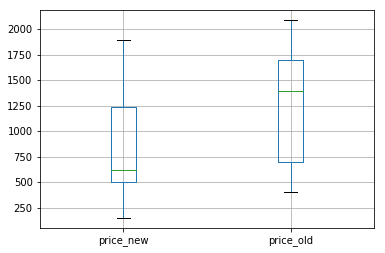

In [9]:
# Boxplots for prices (old and new) for all products.
sonos.boxplot(column=['price_new','price_old'])

 Old prices are much higher because it doesn't take the records with price_old = NaN (No discounts) into account.

In [10]:
# Subset of dataset with speakers that have discounts.

disc = sonos.dropna()
discount = disc.copy()
discount.loc[:,'disc_perc'] = ((discount.loc[:,'price_old']-discount.loc[:,'price_new'])*100)/discount.loc[:,'price_old']
discount

#Both lines of code below led to 'SettingWithCopyWarning'.
#discount.loc[:,'disc_perc'] = (discount.loc[:,'price_old']-discount.loc[:,'price_new'])/discount.loc[:,'price_old']
#discount['disc_perc'] = (discount['price_old']-discount['price_new'])/discount['price_old']

,name,url,description,price_new,price_old,disc_perc
4,Beam,https://www.sonos.com/en-us/shop/beam.html,The smart soundbar for your TV,349,399.0,12.531328
5,Playbar,https://www.sonos.com/en-us/shop/playbar.html,The soundbar for epic home theater,599,699.0,14.306152
6,Playbase,https://www.sonos.com/en-us/shop/playbase.html,The sleek soundbase for theater-quality sound,599,699.0,14.306152
7,Sub,https://www.sonos.com/en-us/shop/sub.html,The subwoofer for more intense bass,599,699.0,14.306152
11,3.1 Entertainment Set with Beam,https://www.sonos.com/en-us/shop/3-1-entertain...,Get immersive sound and deep bass plus voice c...,948,1098.0,13.661202
12,3.1 Entertainment Set with Playbar,https://www.sonos.com/en-us/shop/3-1-home-thea...,Experience epic sound and deep bass for your T...,1198,1398.0,14.306152
13,3.1 Entertainment Set with Playbase,https://www.sonos.com/en-us/shop/3-1-home-thea...,Experience epic sound and deep bass for your T...,1198,1398.0,14.306152
14,5.1 Surround Set with Beam & One,https://www.sonos.com/en-us/shop/5-1-surround-...,"Get full surround sound and deep bass, plus Al...",1327,1496.0,11.296791
15,5.1 Surround Set with Playbar and One,https://www.sonos.com/en-us/shop/5-1-surround-...,"Immerse yourself in shows, movies, music and m...",1577,1796.0,12.193764
16,5.1 Surround Set with Playbase and One,https://www.sonos.com/en-us/shop/5-1-surround-...,"Immerse yourself in shows, movies, music and m...",1577,1796.0,12.193764


In [11]:
len(discount)

16

So 16 products out of 30 have discounts! Let's compare old and new prices for them through a statistical summary.

In [12]:
# Statistical summary for discounted prices - old and new.
discount.describe()

,price_new,price_old,disc_perc
count,16.000000,16.000000,16.000000
mean,1081.312500,1227.937500,12.020794
std,471.902916,529.139738,2.266181
min,349.000000,399.000000,7.173601
25%,599.000000,699.000000,11.158840
50%,1198.000000,1397.000000,12.193764
75%,1496.000000,1696.000000,14.306152
max,1897.000000,2086.000000,14.306152


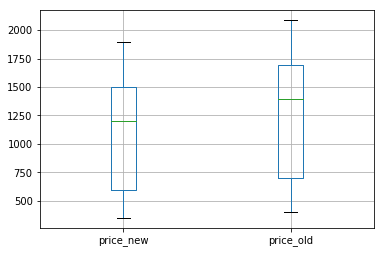

In [13]:
# Boxplots for discounted prices - old and new.

discount.boxplot(column=['price_new','price_old'])

The boxplot for only discounted products makes more sense! Median price has shifted from about $1350 down to $1200.
The maximum price has reduced from $1700 to $1500.

In [14]:
df=sonos.description
df=df.to_frame()

type(df)

pandas.core.frame.DataFrame

# Word Cloud visualization

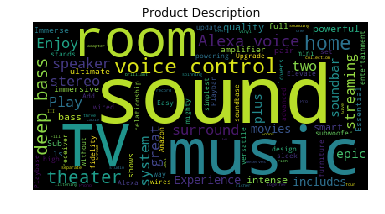

In [15]:
wordcloud=WordCloud().generate(' '.join(sonos['description']))
# Generate plot
plt.title("Product Description")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Unsuprisingly, sound is the most commonly used word.
But we also see 'music', 'room' (multi-room) and 'voice control' appear quite often. These are typically the differentiating factors for Sonos compared to the other speakers in the market. Sonos Sales/Marketing team seems to be doing a great job at projecting this to customers!